# Polynomial KCCA Verification

In [1]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("../../..")
from multiview.embed.kcca import KCCA
import matplotlib.pyplot as plt

# Initialize number of samples
nSamples = 5000

# Define two latent variables (number of samples x 1)
latvar1 = np.random.randn(nSamples,)
latvar2 = np.random.randn(nSamples,)

# Define independent components for each dataset (number of observations x dataset dimensions)
indep1 = np.random.randn(nSamples, 4)
indep2 = np.random.randn(nSamples, 5)

# Create two datasets, with each dimension composed as a sum of 75% one of the latent variables and 25% independent component
data1 = 0.25*indep1 + 0.75*np.vstack((latvar1**2, latvar2**2, latvar1**2, latvar2**2)).T
data2 = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T

#data1 = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2)).T
#data2 = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T

# Split each dataset into two halves: training set and test set
train1 = data1[:nSamples//2]
train2 = data2[:nSamples//2]
test1 = data1[nSamples//2:]
test2 = data2[nSamples//2:]

In [9]:
kcca_l = KCCA(ktype ="poly", reg = 0.001, n_components = 4, degree=2)

# Use the train() method to find a CCA mapping between the two training sets.
kcca_l.fit([train1, train2])

# Use the validate() method to test how well the CCA mapping generalizes to the test data.
# For each dimension in the test data, correlations between predicted and actual data are computed.
testcomps, testcorrs = kcca_l.fit_transform([test1, test2])

In [ ]:
kcca_l.components_[0]

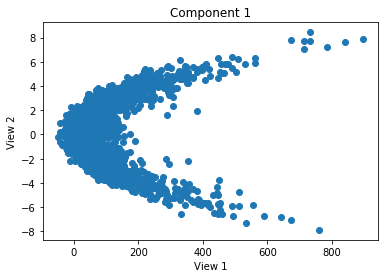

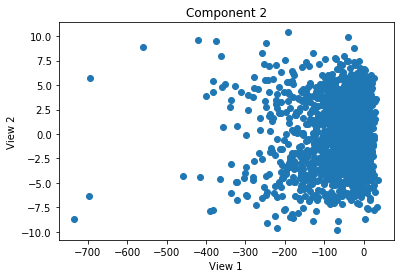

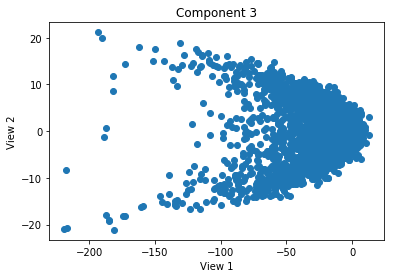

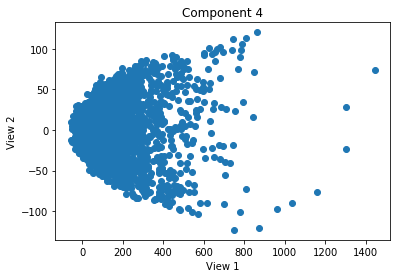

In [10]:
#plotting same components of two views
fig = plt.figure()
plt.scatter(kcca_l.components_[0][:,0],kcca_l.components_[1][:,0])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(kcca_l.components_[0][:,1],kcca_l.components_[1][:,1])
plt.title('Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(kcca_l.components_[0][:,2],kcca_l.components_[1][:,2])
plt.title('Component 3')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(kcca_l.components_[0][:,3],kcca_l.components_[1][:,3])
plt.title('Component 4')
plt.xlabel('View 1')
plt.ylabel('View 2')

"\nfig = plt.figure()\nplt.scatter(kcca_l.components_[1][:,1],kcca_l.components_[1][:,2])\nplt.title('Component 3')\nplt.xlabel('View 1')\nplt.ylabel('View 2')\n\nfig = plt.figure()\nplt.scatter(kcca_l.components_[1][:,0],kcca_l.components_[1][:,3])\nplt.title('Component 4')\nplt.xlabel('View 1')\nplt.ylabel('View 2')\n"

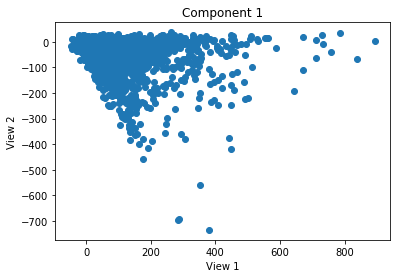

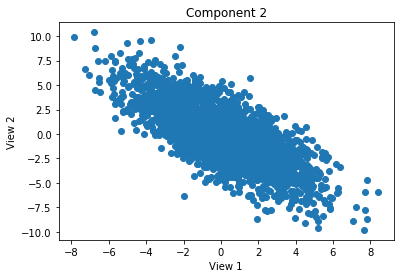

In [6]:
# figure out how to plot the same canonical components of each view
# think you can only do two
fig = plt.figure()
plt.scatter(kcca_l.components_[0][:,0],kcca_l.components_[0][:,1])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(kcca_l.components_[1][:,0],kcca_l.components_[1][:,1])
plt.title('Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')

'''
fig = plt.figure()
plt.scatter(kcca_l.components_[1][:,1],kcca_l.components_[1][:,2])
plt.title('Component 3')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(kcca_l.components_[1][:,0],kcca_l.components_[1][:,3])
plt.title('Component 4')
plt.xlabel('View 1')
plt.ylabel('View 2')
'''

In [7]:
fig = plt.figure()
plt.scatter(kcca_l.components_[0][:,0],kcca_l.components_[0][:,3])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(kcca_l.components_[1][:,0],kcca_l.components_[1][:,1])
plt.title('Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(kcca_l.components_[0][:,0],kcca_l.components_[1][:,1])
plt.title('Component 3')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(kcca_l.components_[1][:,0],kcca_l.components_[1][:,3])
plt.title('Component 4')
plt.xlabel('View 1')
plt.ylabel('View 2')

IndexError: index 3 is out of bounds for axis 1 with size 2

In [ ]:
print('''The prediction accuracy for the first dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
'''% tuple(testcorrs[0]))
print('''The prediction accuracy for the second dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
Dimension 5: %.02f
'''% tuple(testcorrs[1]))

In [ ]:
'''
fig = plt.figure()
plt.scatter(testcomps[0][:,0],testcomps[1][:,0])
fig = plt.figure()
plt.scatter(testcomps[0][:,1],testcomps[1][:,1])
fig = plt.figure()
plt.scatter(testcomps[0][:,2],testcomps[1][:,2])
fig = plt.figure()
plt.scatter(testcomps[0][:,3],testcomps[1][:,3])
'''

Linear kcca works because we were able to derive the linear relationship between the two views. This is shown by using the canonical weights derived from the training data on the testing data. We see that the accuracy of the model on the training data is at least 87% for each of the dimensions, which proves that linear kcca works.